### NLTK and Supervised Learning_Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

import re

In [3]:
#load certain columns of the database

cols = ['publication_date' , 'published_country'   , 'short_blurb','category']

df = pd.read_csv("books_complete.csv", usecols=cols)
df.head(10)

,publication_date,category,published_country,short_blurb
0,08 Oct 2020,artanddesign,England,Walking one day in the woods behind her cottag...
1,05 Nov 2020,artanddesign,United Kingdom,What is it like to grow up in a place where th...
2,06 Oct 2020,artanddesign,New York (State),"""Brandon Stanton's new book, Humans ... shows ..."
3,05 Nov 2020,artanddesign,England,Pac-Man. Mario. Minecraft. Doom. Ever since he...
4,24 Sep 2020,artanddesign,England,"Taken from his 'Collection of Sand', these ess..."
5,24 Sep 2020,artanddesign,England,'Solutions and Other Problems' is written by t...
6,01 Oct 2020,artanddesign,England,'Briggs's pencil has drawn everything about be...
7,03 Nov 2020,artanddesign,England,"From their faithful camper van to boats, kayak..."
8,01 Oct 2020,artanddesign,England,Initially created by a group of friends as an ...
9,06 Oct 2020,artanddesign,England,99% Invisible is a big-ideas podcast about sma...


In [4]:
df.isnull().sum()

publication_date       3
category               0
published_country    300
short_blurb          374
dtype: int64

In [ ]:
# select 3 of the most popular categories
df1=df[(df['category'] == "childrens") | (df['category'] == "crime") | (df['category'] == "politics")].reset_index()
df1=df1.dropna()
df1=df1.drop(['index'], axis=1)
df1.tail(50)

df1['publication_date'].unique()

In [6]:
# Rows where date is Spanish or German, blurbs are not in English, therefore will be droped
df1 = df1.drop(df1[df1["publication_date"] == ' Spanish'].index)
df1 = df1.drop(df1[df1["publication_date"] == ' German'].index)

In [7]:
df1.columns = ['date','category','country','blurb']
df1.describe()

,date,category,country,blurb
count,1521,1521,1521,1521
unique,529,3,33,1485
top,01 Oct 2020,childrens,England,<p><strong>'These were the books that taught m...
freq,101,515,1234,6


In [8]:
df1.to_csv('simple_books.csv')

In [9]:
df1['category'].value_counts()

childrens    515
crime        510
politics     496
Name: category, dtype: int64

##### Simplify published place only by country

In [10]:
us_lst=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware",'District of Columbia',"Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York (State)",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington (State)","West Virginia","Wisconsin","Wyoming", 'enk', 'wiu']
canada_lst=['Alberta','British Columbia','Manitoba','New Brunswick','Newfoundland and Labrador','Nova Scotia',
            'Northwest Territories','Nunavut','Ontario','Prince Edward Island','Quebec','Saskatchewan','Yukon']
UK_lst=['England', 'United Kingdom', 'Scotland','Wales']

In [11]:
def country(co):
    if co in us_lst:
        co='US'
    elif co in canada_lst:
        co='Canada'
    elif co in UK_lst:
        co='UK'
    else:
        co=co
    return co
        
df1['country'] = df1['country'].apply(country)

##### Simplify dates to years

In [12]:
  def year(tt):
    tt=tt[-4:]
    if (tt =='rman' or tt =='nish') :
        tt=2021        
    return tt

df1['date'] = df1['date'].apply(year) 

In [13]:
df1.head()

,date,category,country,blurb
0,2014,childrens,UK,It's Christmas Eve and the jolly postman is de...
1,2020,childrens,UK,"As in 'The Lost Words', these 'spells' take th..."
2,2020,childrens,UK,"Sylvie wakes one night, suddenly, without know..."
3,2020,childrens,UK,It's that special time of year: Christmas. The...
4,2020,childrens,UK,"\n <b> The brand new, laugh-out-loud, spe..."


##### Find the 20 most common words per category

In [14]:
catsdf=df1.groupby('category')['blurb'].apply(list).reset_index()
catsdf.head()

,category,blurb
0,childrens,[It's Christmas Eve and the jolly postman is d...
1,crime,"[In a peaceful retirement village, four unlike..."
2,politics,[What explains the spreading backlash against ...


In [15]:
# Convert each category short blurb into text
child_txt=' '.join(catsdf.iloc[0,1])
crime_txt=' '.join(catsdf.iloc[1,1])
pol_txt=' '.join(catsdf.iloc[2,1])

In [16]:
#remove html tags and special characters

def remove_html_tags(text):
    clean = re.sub(re.compile('<.*?>'), '', text)
    chars= re.sub(r'[^\w\s]', '', clean)
    return chars.lower()

child_txt = remove_html_tags(child_txt)
crime_txt = remove_html_tags(crime_txt)
pol_txt = remove_html_tags(pol_txt)

In [17]:
#Stopwords
stop_words=set(stopwords.words("english"))
stop_words.update(['mr','mrs','also','let','yo','ho','one','1','yet','two','three'])

In [18]:
# set to words the 3 'category' texts
child_word=word_tokenize(child_txt)
crime_word=word_tokenize(crime_txt)
pol_word=word_tokenize(pol_txt)

In [19]:
# remove the stop words
child_filt,crime_filt,pol_filt=[],[],[]

for w in child_word:
    if w not in stop_words:
        child_filt.append(w.lower())
        
for w in crime_word:
    if w not in stop_words:
        crime_filt.append(w.lower())
        
for w in pol_word:
    if w not in stop_words:
        pol_filt.append(w.lower())

In [20]:
# Stemming
ps = PorterStemmer()

child_stem,crime_stem,pol_stem=[],[],[]

for w in child_filt:
    child_stem.append(ps.stem(w))

for w in crime_filt:
    crime_stem.append(ps.stem(w))

for w in pol_filt:
    pol_stem.append(ps.stem(w))

In [21]:
#performing Lemmatization - more descriptive
lem = WordNetLemmatizer()

child_lem, crime_lem, pol_lem=[],[],[]

for w in child_filt:
    child_lem.append(lem.lemmatize(w))

for w in crime_filt:
    crime_lem.append(lem.lemmatize(w))

for w in pol_filt:
    pol_lem.append(lem.lemmatize(w))


In [22]:
#ch = pd.DataFrame(child_lem)

ch_dist, cr_dist, pol_dist = FreqDist(child_lem),FreqDist(crime_lem),FreqDist(pol_lem)
print('children words distribution:',ch_dist)
print('crime words distribution:',cr_dist)
print('politics words distribution:',pol_dist)

children words distribution: <FreqDist with 3927 samples and 13605 outcomes>
crime words distribution: <FreqDist with 6742 samples and 22105 outcomes>
politics words distribution: <FreqDist with 5306 samples and 22344 outcomes>


In [23]:
print('children most common:',ch_dist.most_common(10),'\n')
print('crime most common:',cr_dist.most_common(10),'\n')
print('politics most common:',pol_dist.most_common(10))

children most common: [('book', 275), ('child', 114), ('story', 110), ('little', 105), ('christmas', 90), ('new', 84), ('picture', 75), ('find', 74), ('love', 73), ('world', 72)] 

crime most common: [('murder', 118), ('new', 113), ('life', 106), ('year', 104), ('find', 98), ('man', 98), ('woman', 92), ('secret', 91), ('time', 86), ('world', 81)] 

politics most common: [('book', 269), ('development', 220), ('global', 155), ('international', 151), ('world', 142), ('policy', 124), ('new', 121), ('political', 117), ('economic', 114), ('study', 111)]


In [24]:
# make a list of the combination of the most common in each category
# join the lists
wordlist= ch_dist.most_common(10) + cr_dist.most_common(10) + pol_dist.most_common(10)
# get only the words
words=set()
for duo in wordlist:
    words.add(duo[0])
words=list(words)
print(words)

['woman', 'life', 'book', 'little', 'year', 'time', 'economic', 'find', 'child', 'policy', 'new', 'world', 'picture', 'christmas', 'global', 'international', 'development', 'political', 'murder', 'story', 'secret', 'love', 'man', 'study']


In [25]:
# Add the list of most common words as attributes (columns) to the dataframe 
df1[words] = ''
df1.columns

Index(['date', 'category', 'country', 'blurb', 'woman', 'life', 'book',
       'little', 'year', 'time', 'economic', 'find', 'child', 'policy', 'new',
       'world', 'picture', 'christmas', 'global', 'international',
       'development', 'political', 'murder', 'story', 'secret', 'love', 'man',
       'study'],
      dtype='object')

In [26]:
# filter each blurb before looking for the common words

def retext(blu):
    blurb_word=word_tokenize(blu)
    blurb_filt=[]
    for w in blurb_word:
       if w not in stop_words:
            blurb_filt.append(w.lower())
    blurb_lem=[]
    for w in blurb_filt:
        blurb_lem.append(lem.lemmatize(w))
    return ' '.join(blurb_lem)

        
df1['blurb'] = df1['blurb'].apply(retext) 

In [27]:
# Fill the 'most common words' columns if the word is included in the blurb

for ww in words:
    def wording(n):
        text=n
        if ww in text:
            return int('1')
        else:
            return int('0')

    df1[ww] = df1['blurb'].apply(wording)


In [28]:
# the 'blurb' column is no longer needed
newdf=df1.drop(['blurb'], axis=1).reset_index(drop=True)
newdf.tail(13)

,date,category,country,woman,life,book,little,year,time,economic,...,global,international,development,political,murder,story,secret,love,man,study
1508,2020,politics,Switzerland,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1509,2020,politics,UK,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1510,2019,politics,UK,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1511,2020,politics,Germany,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1512,2020,politics,Germany,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,2020,politics,Netherlands,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
1514,2020,politics,Germany,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1515,2019,politics,UK,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516,2020,politics,Netherlands,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1517,2019,politics,UK,0,0,1,0,0,0,1,...,1,1,1,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Politics books\n')

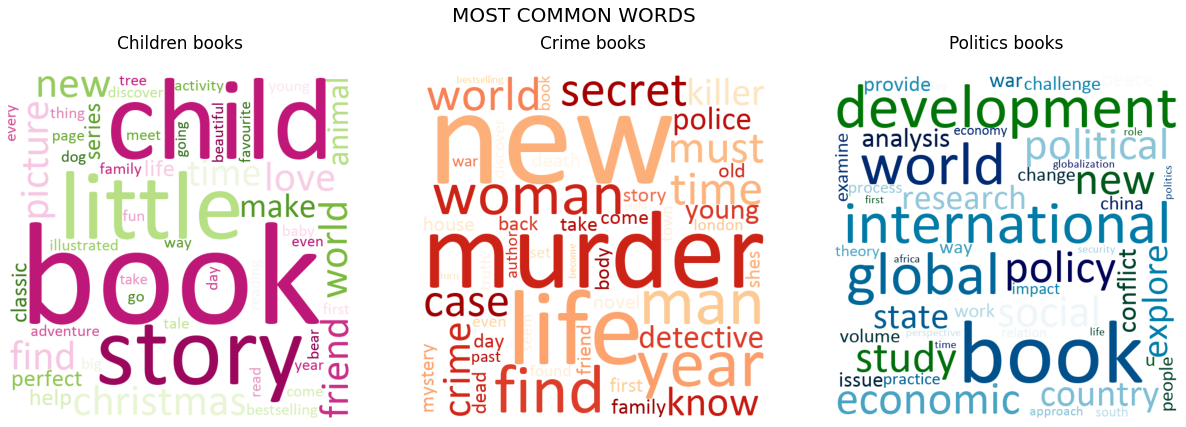

In [29]:
from wordcloud import WordCloud
#funció Wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(9,9))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(21,7)

# Generate word cloud per genere
#child
wordcloud = WordCloud(width = 600, height = 600, random_state=42, max_words=50, relative_scaling=.35,
                      background_color='#ffffff', colormap='PiYG', font_path='/Calibri Regular.ttf',
                      collocations=False).generate(' '.join(map(str, child_lem)))
#crime
wordcloud1 = WordCloud(width = 600, height = 600, random_state=42, max_words=50, relative_scaling=.35,
                      background_color='#ffffff', colormap='OrRd_r', font_path='/Calibri Regular.ttf',
                      collocations=False).generate(' '.join(map(str, crime_lem)))
#politics
wordcloud2 = WordCloud(width = 600, height = 600, random_state=42, max_words=50, relative_scaling=.05,
                      background_color='#ffffff', colormap='ocean', font_path='/Calibri Regular.ttf',
                      collocations=False).generate(' '.join(map(str, pol_lem)))
# Plot
fig.suptitle('MOST COMMON WORDS\n\n\n\n', fontsize=20)
ax[0].imshow(wordcloud)
ax[0].axis("off")
ax[0].set_title('Children books\n', fontsize=17)
ax[1].imshow(wordcloud1)
ax[1].axis("off")
ax[1].set_title('Crime books\n', fontsize=17)
ax[2].imshow(wordcloud2)
ax[2].axis("off")
ax[2].set_title('Politics books\n', fontsize=17)

<br><br><br><br><br>
### Pipeline, GridSearch and RandomForest
The goal of the trained data is to guess the category of the book using the country and year of publication and the blurb's wording

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report,plot_confusion_matrix
from sklearn import metrics

In [31]:
# apply OnHotEncoder to 'country' column
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(newdf[['country']]).toarray())
enc_df.columns = enc.get_feature_names(['country'])

# merge with main df bridge_df on key values
newdf = newdf.join(enc_df)
newdf.head(3)

,date,category,country,woman,life,book,little,year,time,economic,...,country_France,country_Germany,country_India,country_Netherlands,country_New Zealand,country_Singapore,country_Switzerland,country_UK,country_US,country_United States
0,2014,childrens,UK,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,childrens,UK,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020,childrens,UK,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
newdf=newdf.drop(['country'],axis=1)

In [33]:
newdf.to_csv('books.csv')

##### Pipeline

In [111]:
rfc = RandomForestClassifier()

numeric_features = ['date']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),])


steps = [('preprocessor', preprocessor), ('classifier', rfc)]
pipeline = Pipeline(steps) # define the pipeline object.

In [132]:
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['date'])])),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['date'])]),
 'classifier': RandomForestClassifier(),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'drop',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('nu

##### Create train set, test set and target
the categories are evenly distributed so no stratification needed

In [42]:
X,y = newdf.loc[:, newdf.columns != 'category'],newdf.loc[:, newdf.columns == 'category']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

##### GridSearch

In [130]:
parameteres = {
    'classifier__n_estimators': [100, 500, 1200],
    'classifier__max_features': ['auto','sqrt','log2'],
    'classifier__class_weight':['balanced',None],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']
}

grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [131]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = 0.43
{'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}


##### Train the RandomForestClassifier
With the hiperparamers obtained from the gridsearch

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(max_depth=4, random_state=42, criterion='gini', n_estimators=100,max_features='sqrt',class_weight='balanced')
scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean()
print('Accuracy Score: %.4f' % scores)

Accuracy Score: 0.7423


In [49]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))

[[113  10   5]
 [ 44  71   5]
 [ 15   2 116]]


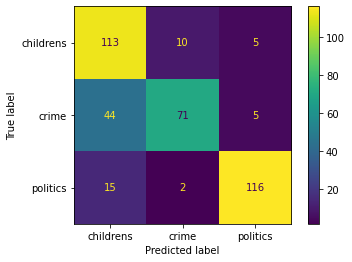

In [51]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [52]:
acc= round(metrics.accuracy_score(y_test, y_pred), 4)

print ('Accuracy:',acc)

print(metrics.classification_report(y_test, y_pred, digits=3))


Accuracy: 0.7874
              precision    recall  f1-score   support

   childrens      0.657     0.883     0.753       128
       crime      0.855     0.592     0.700       120
    politics      0.921     0.872     0.896       133

    accuracy                          0.787       381
   macro avg      0.811     0.782     0.783       381
weighted avg      0.812     0.787     0.786       381



<br><br><br><br><br>
### Sentiment Analysis

In [135]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [154]:
sent_child=sia.polarity_scores(child_txt)
sent_child

{'neg': 0.044, 'neu': 0.715, 'pos': 0.241, 'compound': 1.0}

In [155]:
sent_crime=sia.polarity_scores(crime_txt)
sent_crime

{'neg': 0.189, 'neu': 0.707, 'pos': 0.104, 'compound': -1.0}

In [157]:
sent_pol=sia.polarity_scores(pol_txt)
sent_pol

{'neg': 0.079, 'neu': 0.803, 'pos': 0.118, 'compound': 1.0}

In [142]:
type(sia.polarity_scores(pol_txt))

dict

In [158]:
dict=[]
dict.append(sent_child)
dict.append(sent_crime)
dict.append(sent_pol)

In [159]:
dict

[{'neg': 0.044, 'neu': 0.715, 'pos': 0.241, 'compound': 1.0},
 {'neg': 0.189, 'neu': 0.707, 'pos': 0.104, 'compound': -1.0},
 {'neg': 0.079, 'neu': 0.803, 'pos': 0.118, 'compound': 1.0}]

In [165]:
df = pd.DataFrame.from_dict(dict)
df.rename(index={0: "children", 1: "crime", 2: "politics"},inplace=True)
df

,neg,neu,pos,compound
children,0.044,0.715,0.241,1.0
crime,0.189,0.707,0.104,-1.0
politics,0.079,0.803,0.118,1.0
